In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import math
from collections import Counter
import requests
import random
from string import ascii_lowercase

In [2]:
TEXT = requests.get('https://norvig.com/big.txt').text

In [3]:
len(TEXT)

6488666

In [4]:
def tokens(text):
    return re.findall(r'[a-z]+', text.lower())

In [5]:
WORDS = tokens(TEXT)
len(WORDS)

1105285

In [6]:
tokens('This is: A test, 1, 3, 4, this is/.')

['this', 'is', 'a', 'test', 'this', 'is']

In [7]:
WORDS_UNIQUE = list(set(WORDS))
len(WORDS_UNIQUE)

29157

In [8]:
print(WORDS_UNIQUE[:10])

['fix', 'ville', 'writs', 'gonorrhoeal', 'bast', 'thymus', 'circumspect', 'thinks', 'exorbitant', 'alpha']


In [9]:
print(WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


In [10]:
def sample(bag, n=10):
    return ' '.join(random.choice(bag) for _ in range(n))

In [11]:
sample(WORDS)

'felt a that one a of wheels or pierre russian'

In [12]:
Counter(tokens("Is this a test? It is a test!"))

Counter({'is': 2, 'this': 1, 'a': 2, 'test': 2, 'it': 1})

In [13]:
COUNTS = Counter(WORDS)

In [14]:
print(COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [15]:
len(COUNTS)

29157

In [16]:
for w in tokens('the rare and neverbeforeseen words'):
    print(COUNTS[w], w)

80030 the
83 rare
38313 and
0 neverbeforeseen
460 words


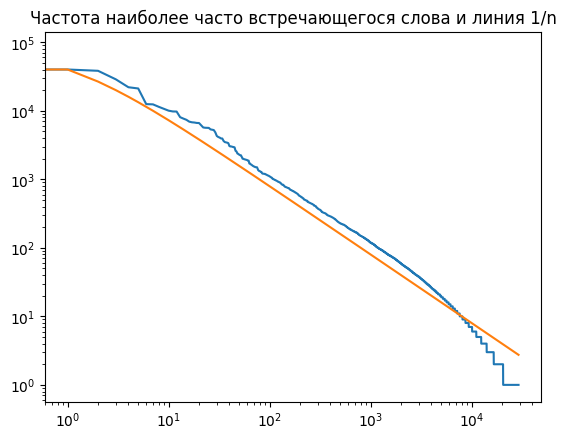

In [17]:
M = COUNTS['the']
plt.yscale('log');
plt.xscale('log');
plt.title('Частота наиболее часто встречающегося слова и линия 1/n')
plt.plot([c for (w, c) in COUNTS.most_common()])
plt.plot([M/i for i in range(1, len(COUNTS))]);

In [18]:
def correct(word):
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    return max(candidates, key=COUNTS.get)

def known(words):
    return {w for w in words if w in COUNTS}

def edits0(word):
    return {word}

def edits2(word):
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def edits1(word):
    pairs = splits(word)
    deletes = [a+b[1:] for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces = [a+c+b[1:] for (a, b) in pairs for c in ascii_lowercase if b]
    inserts = [a+c+b for (a, b) in pairs for c in ascii_lowercase]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    return [(word[:i], word[i:]) for i in range(len(word)+1)]

In [19]:
splits('word')

[('', 'word'), ('w', 'ord'), ('wo', 'rd'), ('wor', 'd'), ('word', '')]

In [20]:
print(edits0('word'))

{'word'}


In [21]:
print(edits1('word'))

{'wod', 'worq', 'wore', 'woird', 'wnrd', 'wcrd', 'wuord', 'wozrd', 'worrd', 'wourd', 'wordm', 'wowrd', 'wordw', 'wobrd', 'wordz', 'wormd', 'wocd', 'womd', 'weord', 'wkrd', 'wocrd', 'worb', 'xord', 'wojd', 'wowd', 'wors', 'cword', 'wodrd', 'wordp', 'wordh', 'wjord', 'eword', 'xword', 'rword', 'whrd', 'wotd', 'worg', 'worde', 'worh', 'worp', 'wordo', 'wordu', 'worw', 'mword', 'worzd', 'wxord', 'werd', 'worl', 'tord', 'worv', 'wford', 'wokrd', 'woyrd', 'owrd', 'wrrd', 'gord', 'wtrd', 'qword', 'waord', 'wonrd', 'wornd', 'worpd', 'words', 'wzrd', 'wordt', 'wori', 'wordl', 'wohd', 'wordj', 'fword', 'sword', 'woprd', 'iord', 'workd', 'worhd', 'woid', 'woqd', 'vord', 'wsrd', 'wvord', 'pord', 'wovrd', 'wodr', 'wond', 'wosd', 'wbord', 'tword', 'work', 'wolrd', 'pword', 'vword', 'kord', 'worod', 'wobd', 'worn', 'wwrd', 'world', 'wqrd', 'wfrd', 'woxd', 'wora', 'uord', 'wortd', 'wmrd', 'worj', 'oord', 'wtord', 'woord', 'jord', 'wprd', 'wopd', 'yword', 'worxd', 'hord', 'wohrd', 'nord', 'worgd', 'wor

In [22]:
len(edits1('word'))

234

In [23]:
len(edits2('word'))

24254

In [24]:
str_norm = 'The storm covers the sky with mist, twisting the snow whirlwinds.'

In [35]:
str_error = 'Th strom coveerse tha skay wiht meest, twisteeng te sno wirlwinds.'

In [36]:
tokens(str_error)

['th',
 'strom',
 'coveerse',
 'tha',
 'skay',
 'wiht',
 'meest',
 'twisteeng',
 'te',
 'sno',
 'wirlwinds']

In [37]:
list(map(correct, tokens(str_error)))

['th',
 'storm',
 'covers',
 'the',
 'say',
 'with',
 'meet',
 'twisting',
 'te',
 'so',
 'whirlwind']

In [28]:
list(map(correct, tokens('Speling errurs in simethink. Whutever; unusuel misteakes everyware?')))

['spelling',
 'errors',
 'in',
 'something',
 'whatever',
 'unusual',
 'mistakes',
 'everywhere']

In [29]:
def correct_text(text):
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [30]:
list(map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase']))

[<method 'upper' of 'str' objects>,
 <method 'lower' of 'str' objects>,
 <method 'title' of 'str' objects>,
 str]

In [38]:
correct_text(str_error)

'Th storm covers the say with meet, twisting te so whirlwind.'